Einstellen bei Oekofen: oekofen_puffertemp_min_ein_TPO 60.0
Einstellen bei Oekofen: oekofen_Abschaltueberhoehung_2 5.0
Einstellen bei Oekofen: oekofen_puffertemp_min_aus_TPM 60.0
Einstellen bei Oekofen: oekofen_Abschaltueberhoehung_1 10.0


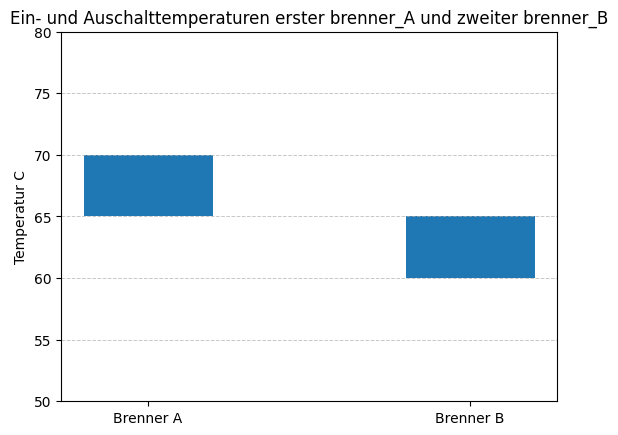

In [12]:
class Temperaturen:
    def __init__(self) -> None:
        '''ich waehle'''
        self.TPO_ein_A_C = 65.0 # Einschalttemperatur erster Brenner, A
        self.TPM_aus_A_C = 70.0 # Ausschalttemperatur erster Brenner, A
        self.TPO_ein_B_C = 60.0 # Einschalttemperatur zweiter Brenner, B
        self.TPM_aus_B_C = 65.0 # Ausschalttemperatur zweiter Brenner, B

        self.oekofen_puffertemp_min_ein_TPO = self.TPO_ein_B_C
        self.oekofen_Abschaltueberhoehung_2 = self.TPO_ein_A_C - self.oekofen_puffertemp_min_ein_TPO
        self.oekofen_puffertemp_min_aus_TPM = self.TPM_aus_B_C - self.oekofen_Abschaltueberhoehung_2
        self.oekofen_Abschaltueberhoehung_1 = self.TPM_aus_A_C - self.oekofen_puffertemp_min_aus_TPM

        print(f'Einstellen bei Oekofen: oekofen_puffertemp_min_ein_TPO {self.oekofen_puffertemp_min_ein_TPO}')
        print(f'Einstellen bei Oekofen: oekofen_Abschaltueberhoehung_2 {self.oekofen_Abschaltueberhoehung_2}')
        print(f'Einstellen bei Oekofen: oekofen_puffertemp_min_aus_TPM {self.oekofen_puffertemp_min_aus_TPM}')
        print(f'Einstellen bei Oekofen: oekofen_Abschaltueberhoehung_1 {self.oekofen_Abschaltueberhoehung_1}')

t = Temperaturen()

import matplotlib.pyplot as plt
labels = ['Brenner A', 'Brenner B']
bottoms = [t.TPO_ein_A_C, t.TPO_ein_B_C]  # Untere Grenze der Balken
heights = [t.TPM_aus_A_C - t.TPO_ein_A_C, t.TPM_aus_B_C - t.TPO_ein_B_C]  # Höhe der Balken
plt.bar(labels, heights, bottom=bottoms, width=0.4)
plt.ylim(50, 80)
plt.ylabel('Temperatur C')
plt.title('Ein- und Auschalttemperaturen erster brenner_A und zweiter brenner_B')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

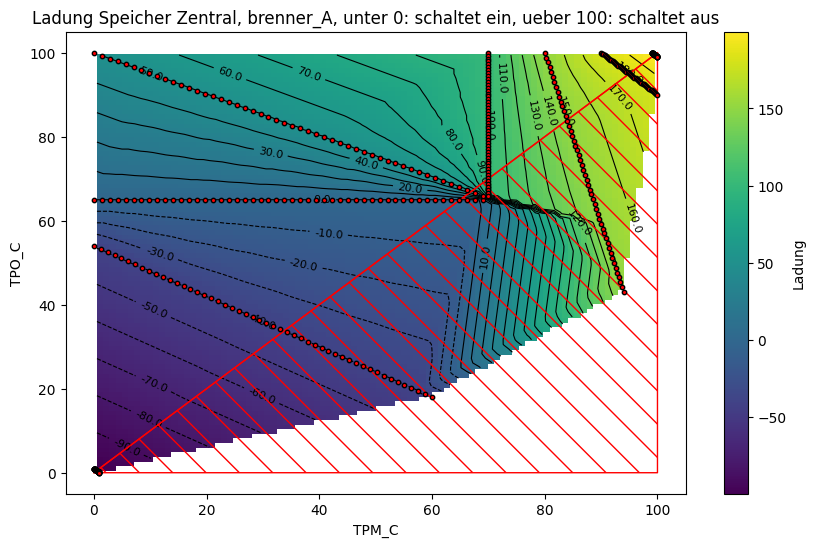

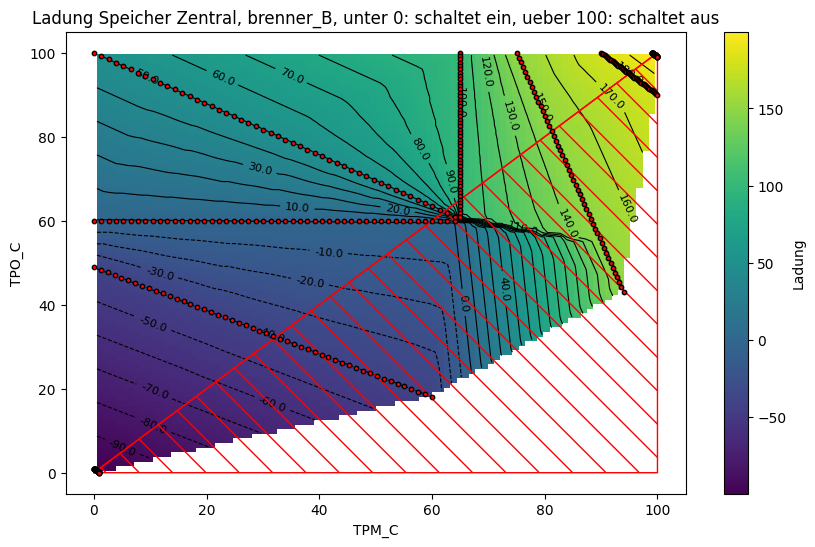

In [13]:
def darstellen(brennernamen, temp_ein_C, temp_aus_C):

    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.interpolate import LinearNDInterpolator

    offset = 1.0
    lines = [
        # (x1, y1, x2, y2, value)
        (0, temp_ein_C, temp_aus_C-offset, temp_ein_C, 0), # Einschalten
        (temp_aus_C, 100, temp_aus_C, temp_ein_C+offset, 100), # Ausschalten
        (temp_aus_C-offset, temp_ein_C+offset, 0, 100, 50), # 50% linie
        (0, 1,1, 0, -100),
        (0, temp_ein_C-11.0,60, 18, -40),
        (temp_aus_C+10.0, 100,94, 43, 150),
        (90, 100, 100, 90, 180),
        (99, 100, 100, 99, 200),
    ]

    x = []
    y = []
    z = []

    for (x1, y1, x2, y2, value) in lines:
        num_points = 50
        xi = np.linspace(x1, x2, num_points)
        yi = np.linspace(y1, y2, num_points)
        # Falls Linien vertikal oder horizontal sind
        if x1 == x2:  # vertikal
            yi = np.linspace(y1, y2, num_points)
            xi = np.full_like(yi, x1)
        elif y1 == y2:  # horizontal
            xi = np.linspace(x1, x2, num_points)
            yi = np.full_like(xi, y1)
        
        x.extend(xi)
        y.extend(yi)
        z.extend([value] * num_points)
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    points = np.c_[x, y]
    interpolator = LinearNDInterpolator(points, z)
    X = np.linspace(min(x) - 5, max(x) + 5, 100)
    Y = np.linspace(min(y) - 5, max(y) + 5, 100)
    X, Y = np.meshgrid(X, Y)
    Z = interpolator(X, Y)
    levels = np.arange(-100, 200, 10)
    plt.figure(figsize=(10, 6))
    plt.title(f"Ladung Speicher Zentral, {brennernamen}, unter 0: schaltet ein, ueber 100: schaltet aus")
    plt.imshow(Z, extent=(min(x) - 5, max(x) + 5, min(y) - 5, max(y) + 5), origin='lower', cmap='viridis', aspect='auto')
    plt.colorbar(label='Ladung')
    contour = plt.contour(X, Y, Z, levels=levels, colors='black', linewidths=0.8)
    plt.clabel(contour, inline=True, fontsize=8, fmt='%1.1f', colors='black')
    plt.scatter(x, y, color='red', edgecolor='k', s=10, zorder=5)
    plt.xlabel("TPM_C")
    plt.ylabel("TPO_C")
    plt.plot([0, 100], [0, 100], color='red', linewidth=1)
    plt.fill_between(x=np.linspace(0, 100, 500), y1=0, y2=np.linspace(0, 100, 500), 
                    where=(np.linspace(0, 100, 500) <= np.linspace(0, 100, 500)), 
                    facecolor='none', hatch= ('\\'), edgecolor='red', alpha=1, zorder=4)
    plt.show()

darstellen(brennernamen='brenner_A', temp_ein_C=t.TPO_ein_A_C, temp_aus_C=t.TPM_aus_A_C)
darstellen(brennernamen='brenner_B', temp_ein_C=t.TPO_ein_B_C, temp_aus_C=t.TPM_aus_B_C)